*ANALYSIS PURPOSE*
The Wholesale Customers dataset consists of annual spending on different product categories by various customers. The analysis purpose of this dataset is to identify patterns and group customers with similar spending habits using clustering techniques.With a greater understanding of their consumer base, organizations may then adjust their marketing and sales strategy.  The dataset contains seven variables representing different product categories, namely Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen. The goal of clustering is to group customers into segments based on their spending behavior across these categories


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
df = df.drop(['Channel', 'Region'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [21]:
df = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen' ]]

In [22]:
df = df.fillna(df.mean())

In [31]:
km =KMeans(n_clusters =3,n_init=10)
km.fit(df)
df['cluster'] = km.labels_
print(df)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  cluster  \
0    12669   9656     7561     214              2674        1338        1   
1     7057   9810     9568    1762              3293        1776        1   
2     6353   8808     7684    2405              3516        7844        1   
3    13265   1196     4221    6404               507        1788        1   
4    22615   5410     7198    3915              1777        5185        2   
..     ...    ...      ...     ...               ...         ...      ...   
435  29703  12051    16027   13135               182        2204        2   
436  39228   1431      764    4510                93        2346        2   
437  14531  15488    30243     437             14841        1867        0   
438  10290   1981     2232    1038               168        2125        1   
439   2787   1698     2510      65               477          52        1   

     Cluster  
0          1  
1          1  
2          1  
3          1  


In [24]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

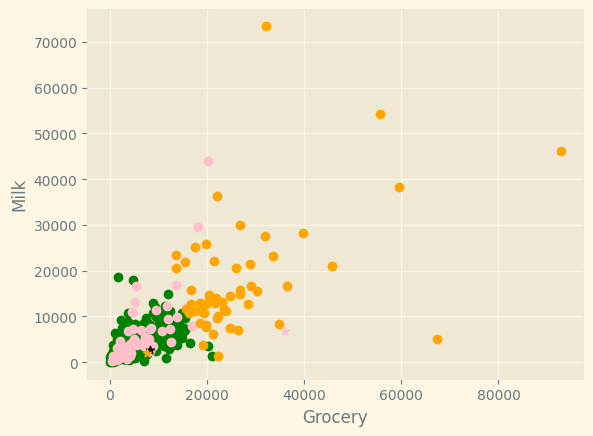

In [25]:
plt.scatter(df1.Grocery, df1.Milk, color ='green')
plt.scatter(df2.Grocery, df2.Milk, color ='pink')
plt.scatter(df3.Grocery, df3.Milk, color ='orange')
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.scatter(km.cluster_centers_[ 0][0], km.cluster_centers_[0][3], color='black', marker ='*')
plt.scatter(km.cluster_centers_[ 1][0], km.cluster_centers_[1][3], color='pink', marker ='*')
plt.scatter(km.cluster_centers_[ 2][0], km.cluster_centers_[2][3], color='orange', marker ='*')
plt.show()

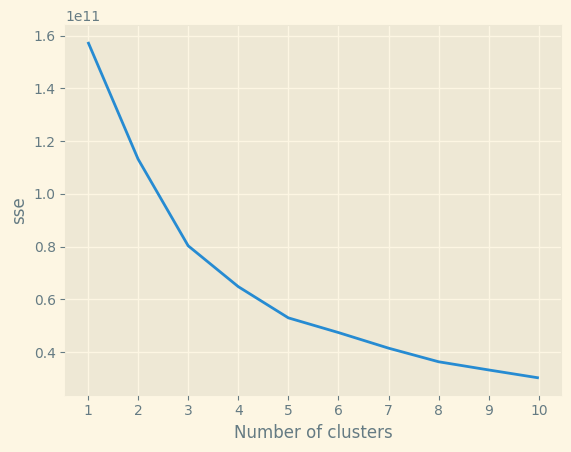

In [33]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), sse)
plt.style.use("Solarize_Light2")
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

In [34]:
km = KMeans(n_clusters=5, n_init=10)
km.fit(df)
df['Cluster'] = km.labels_
print(df)


     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  cluster  \
0    12669   9656     7561     214              2674        1338        1   
1     7057   9810     9568    1762              3293        1776        1   
2     6353   8808     7684    2405              3516        7844        1   
3    13265   1196     4221    6404               507        1788        1   
4    22615   5410     7198    3915              1777        5185        2   
..     ...    ...      ...     ...               ...         ...      ...   
435  29703  12051    16027   13135               182        2204        2   
436  39228   1431      764    4510                93        2346        2   
437  14531  15488    30243     437             14841        1867        0   
438  10290   1981     2232    1038               168        2125        1   
439   2787   1698     2510      65               477          52        1   

     Cluster  
0          0  
1          0  
2          0  
3          0  


In [35]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster ==3]
df5 = df[df.cluster==4]


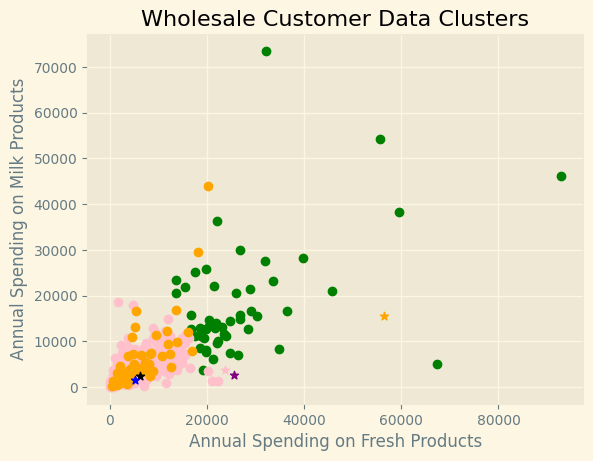

In [37]:
plt.scatter(df1.Grocery, df1.Milk, color ='green')
plt.scatter(df2.Grocery, df2.Milk, color ='pink')
plt.scatter(df3.Grocery, df3.Milk, color ='orange')
plt.scatter(df4.Grocery, df4.Milk, color ='blue')
plt.scatter(df5.Grocery, df5.Milk, color ='purple')

plt.title('Wholesale Customer Data Clusters')
plt.xlabel('Annual Spending on Fresh Products')
plt.ylabel('Annual Spending on Milk Products')
plt.scatter(km.cluster_centers_[ 0][0], km.cluster_centers_[0][3], color='black', marker ='*')
plt.scatter(km.cluster_centers_[ 1][0], km.cluster_centers_[1][3], color='pink', marker ='*')
plt.scatter(km.cluster_centers_[ 2][0], km.cluster_centers_[2][3], color='orange', marker ='*')
plt.scatter(km.cluster_centers_[ 3][0], km.cluster_centers_[3][3], color='blue', marker ='*')
plt.scatter(km.cluster_centers_[ 4][0], km.cluster_centers_[4][3], color='purple', marker ='*')
plt.show()